<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

## VIIRS Level 2 SNPP - Deep Blue Aerosol Product - AERDB_L2_VIIRS_SNPP 

### About

This notebook shows the structure of the `VIIRS Deep Blue Aerosol Product` and what information of the data files can be used in order to load, browse and visualize Aerosol Optical Depth (AOD). AOD is an aerosol-related parameter that is retrieved from satellites. AOD is also referred to as aerosol optical thickness (AOT) and relates to the amount of light aerosols scatter or absorb in a column through the atmosphere.

The Visible Infrared Imaging Radiometer Suite ([VIIRS](https://www.earthdata.nasa.gov/sensors/viirs)) instrument is aboard the joint NASA/NOAA Suomi National Polar-orbiting Partnership ([Suomi NPP](https://www.nasa.gov/mission_pages/NPP/main/index.html)) and [NOAA-20](https://www.nesdis.noaa.gov/JPSS-1) satellites. 

The [Level 2 Deep Blue AOD data products](https://earth.gsfc.nasa.gov/climate/data/deep-blue/)) , at 550 nm reference wavelengths, are derived from particular VIIRS bands using two primary AOD retrieval algorithms: Deep Blue algorithm over land, and the Satellite Ocean Aerosol Retrieval (SOAR) algorithm over ocean. 

The VIIRS NASA standard Level-2 (L2) Deep Blue aerosol products from the Suomi National Polar-orbiting Partnership (SNPP) instrument provide satellite-derived measurements of Aerosol Optical Thickness (AOT) and their properties over land and ocean in 6-minute data granules with daily global coverage. This orbit-level product (Short-name: AERDB_L2_VIIRS_ SNPP) has an at-nadir resolution of 6 km x 6 km, and progressively increases away from nadir given the sensor’s scanning geometry and Earth’s curvature. Viewed differently, this product’s resolution accommodates 8 x 8 native VIIRS moderate-resolution (M-band) pixels that nominally have ~750 m horizontal pixel size.

This notebook uses the VIIRS AERDB_L2 dataset from the SNPP platform and features increased aerosol occurrence over the Indo Gangetic Plain (IGP) on 2 November 2022 due to crop burning.


### Basic Facts

> **Spatial Resolution**:	`6 km x 6 km` <br>
> **Temporal Resolution**:	`6 minute` <br>

### How to access the data

The VIIRS from SNPP *AERDB_L2_VIIRS_SNPP* data can be ordered via the [LAADS DAAC](https://ladsweb.modaps.eosdis.nasa.gov/search/order/1/AERDB_L2_VIIRS_SNPP--5200) and are distributed in `netcdf` format. 

You need to [register for an Earthdata account](https://urs.earthdata.nasa.gov/) in order to be able to download data. 


### Module outline
- [1 - Load and browse VIIRS Aerosol Data Product](#viirs_load)
- [2 - Visualize the VIIRS Level 2 AOD Data](#aod_map)

<hr>

#### Load required libraries

In [9]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#### Load helper functions

In [10]:
%run ../functions.ipynb

<hr>

## <a id='viirs_load'></a>Load and browse VIIRS Aerosol Data Product

An example VIIRS SNPP L2 data file is available under `../../eodata/acam_training_school/VIIRS/AOD_L2/`. VIIRS SNPP L2 datasets are disseminated in netCDF. Hence, you can use the xarray function `open_dataset()` to open the file. The file is from 2 November 2022. Once loaded, you see that the data holds 48 variables organised in five dimensions.

In [2]:
file = xr.open_dataset('../../eodata/acam_training_school/VIIRS/L2_AOD/AERDB_L2_VIIRS_SNPP.A2022306.0812.002.2023075220421.nc')
file

<xarray.Dataset>
Dimensions:                                                   (Idx_Atrack: 406, Idx_Xtrack: 400, Land_Bands: 3, Ocean_Bands: 7, Reflectance_Bands: 8)
Coordinates:
  * Idx_Atrack                                                (Idx_Atrack) float32 ...
  * Idx_Xtrack                                                (Idx_Xtrack) float32 ...
  * Land_Bands                                                (Land_Bands) float32 ...
    Latitude                                                  (Idx_Atrack, Idx_Xtrack) float32 ...
    Longitude                                                 (Idx_Atrack, Idx_Xtrack) float32 ...
  * Ocean_Bands                                               (Ocean_Bands) float32 ...
  * Reflectance_Bands                                         (Reflectance_Bands) float32 ...
Data variables: (12/48)
    Aerosol_Optical_Thickness_550_Expected_Uncertainty_Land   (Idx_Atrack, Idx_Xtrack) float32 ...
    Aerosol_Optical_Thickness_550_Expected_Uncertainty_Ocean  (Idx_Atrack, Idx_Xtrack) float32 ...
    Aerosol_Optical_Thickness_550_Land                        (Idx_Atrack, Idx_Xtrack) float32 ...
    Aerosol_Optical_Thickness_550_Land_Best_Estimate          (Idx_Atrack, Idx_Xtrack) float32 ...
    Aerosol_Optical_Thickness_550_Land_Ocean                  (Idx_Atrack, Idx_Xtrack) float32 ...
    Aerosol_Optical_Thickness_550_Land_Ocean_Best_Estimate    (Idx_Atrack, Idx_Xtrack) float32 ...
    ...                                                        ...
    TOA_NDVI                                                  (Idx_Atrack, Idx_Xtrack) float32 ...
    Total_Column_Ozone                                        (Idx_Atrack, Idx_Xtrack) float32 ...
    Unsuitable_Pixel_Fraction_Land_Ocean                      (Idx_Atrack, Idx_Xtrack) float32 ...
    Viewing_Zenith_Angle                                      (Idx_Atrack, Idx_Xtrack) float32 ...
    Wind_Direction                                            (Idx_Atrack, Idx_Xtrack) float32 ...
    Wind_Speed                                                (Idx_Atrack, Idx_Xtrack) float32 ...
Attributes: (12/58)
    processing_level:                  L2
    cdm_data_type:                     swath
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    Keywords:                          EARTH SCIENCE > ATMOSPHERE > AEROSOLS ...
    license:                           http://science.nasa.gov/earth-science/...
    stdname_vocabulary:                NetCDF Climate and Forecast (CF) Metad...
    ...                                ...
    time_coverage_end:                 2022-11-02T08:18:00.000Z
    startDirection:                    Ascending
    endDirection:                      Ascending
    OrbitNumber:                       57076
    DayNightFlag:                      Day
    xmlmetadata:                       <?xml version="1.0"?>\n<!DOCTYPE Granu...

In a next step, you can select the variable of interest: `Aerosol Optical Thickness 550 Land Ocean Best Estimate`. You can load a variable's data array by specifying the variable's name with square brackets. Once you loaded the data array, additional attributes, e.g. long_name or units, to describe the variable are available.

In [11]:
aod = file['Aerosol_Optical_Thickness_550_Land_Ocean_Best_Estimate']
aod

<xarray.DataArray 'Aerosol_Optical_Thickness_550_Land_Ocean_Best_Estimate' (Idx_Atrack: 406, Idx_Xtrack: 400)>
array([[0.312568, 0.323851,      nan, ..., 0.378778, 0.382379, 0.379953],
       [     nan,      nan,      nan, ..., 0.389564, 0.392302, 0.31685 ],
       [     nan,      nan,      nan, ..., 0.391182, 0.394615, 0.318524],
       ...,
       [0.113802, 0.115948, 0.111657, ...,      nan,      nan,      nan],
       [0.125895, 0.120326, 0.11141 , ...,      nan,      nan,      nan],
       [0.100894, 0.116696, 0.102349, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * Idx_Atrack  (Idx_Atrack) float32 1.0 2.0 3.0 4.0 ... 403.0 404.0 405.0 406.0
  * Idx_Xtrack  (Idx_Xtrack) float32 1.0 2.0 3.0 4.0 ... 397.0 398.0 399.0 400.0
    Latitude    (Idx_Atrack, Idx_Xtrack) float32 18.16 18.15 ... 33.92 33.88
    Longitude   (Idx_Atrack, Idx_Xtrack) float32 90.1 89.98 89.86 ... 54.04 53.9
Attributes:
    units:        1
    long_name:    Deep Blue/SOAR aerosol optical thickness at 550 nm over lan...
    valid_range:  [0. 5.]

One data file also holds Quality Flag information for each variable. Hence, in a next step, you can load the Quality Flag for Aerosol Optical Thickness and filter out pixels that do not have the required quality standard. All pixels with a Quality Flag of 3 can be kept, all others will be set to NaN.

In [4]:
qa = file.Aerosol_Optical_Thickness_QA_Flag_Land
aod_qa = xr.where(qa==3, aod, np.nan)
aod_qa

<xarray.DataArray (Idx_Atrack: 406, Idx_Xtrack: 400)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.11380206, 0.11594798, 0.11165727, ...,        nan,        nan,
               nan],
       [0.12589498, 0.12032598, 0.11141001, ...,        nan,        nan,
               nan],
       [0.10089397, 0.11669577, 0.10234877, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * Idx_Atrack  (Idx_Atrack) float32 1.0 2.0 3.0 4.0 ... 403.0 404.0 405.0 406.0
  * Idx_Xtrack  (Idx_Xtrack) float32 1.0 2.0 3.0 4.0 ... 397.0 398.0 399.0 400.0
    Latitude    (Idx_Atrack, Idx_Xtrack) float32 18.16 18.15 ... 33.92 33.88
    Longitude   (Idx_Atrack, Idx_Xtrack) float32 90.1 89.98 89.86 ... 54.04 53.9

In a last step before the visualization, you can define variables for the latitude and longitude coordinates. These variables can then be used during the visualization step.

In [5]:
latitude = file.Latitude
longitude = file.Longitude

##  <a id='aod_map'></a>Visualize VIIRS SNPP Level 2 AOD Data

The last step is to fisualize the Aerosol Optical Depth on 2 November 2022 over the Indo Gangetic Plain.

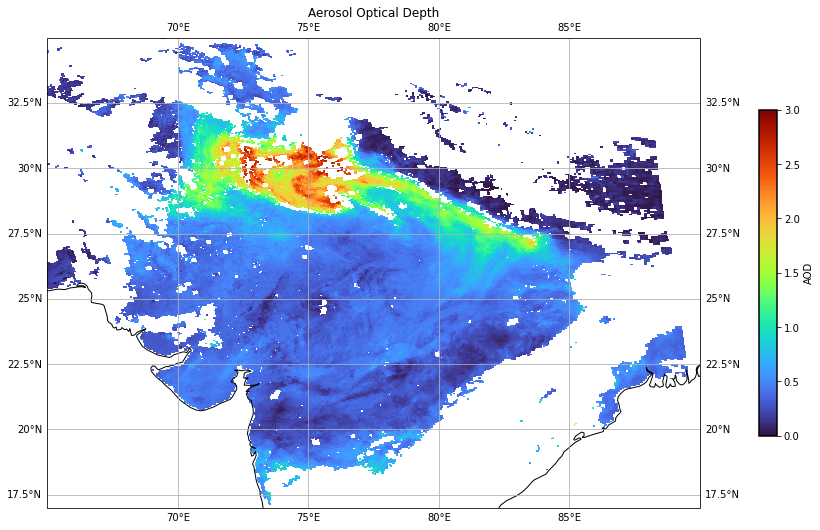

In [8]:
#Create a figure and axis with the desired projection
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot AOD data
mesh = ax.pcolormesh(longitude, latitude, aod_qa, cmap='turbo', transform=ccrs.PlateCarree(), vmin=0, vmax=3)

# Add colorbar
cbar = fig.colorbar(mesh, ax=ax, label='AOD', shrink=0.5, pad=0.07, aspect=18)

# Adjust the colorbar thickness
cbar.outline.set_linewidth(1.5)

# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set title and labels
plt.title('Aerosol Optical Depth')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the scale of x-axis and y-axis
ax.set_xlim(65, 90)
ax.set_ylim(17, 35)

# Show the plot
plt.show()

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>